In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Analise.ipynb
# Github:@WeDias

# MIT License

# Copyright (c) 2019-2020 Wesley Ribeiro Dias

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


#Fonte: INEP, Censo Escolar 2008-2018. Dispinível em http://portal.inep.gov.br/microdados

import pandas as pd
import matplotlib.pyplot as plt
from hashlib import md5
from datetime import datetime


##Função para verificar a integridade dos dados
def integridade(arq, ver):
    '''
    def integridade(): Serve para verificar a integridade dos arquivos;
    -------------------------------------------------------------------------------------
    arq: Local do arquivo, que será usado para buscar a hash md5;
    ver: Hash para ser comparada com a hash obtida do arquivo.
    '''
    with open(arq, 'rb') as arquivo:
        Cria_Hash = md5()
        Conteudo = arquivo.read()
        Cria_Hash.update(Conteudo)
        return Cria_Hash.hexdigest() == ver

    
##Função para facilitar a criação de gráficos de linha
def grafico(x, y, titulo='Gráfico', cor='black', xnome='Renomear', ynome='Renomear', dados=True):
    '''
    def grafico(): Serve para criar um gráfico de linha, usando os dados do df_resultado;
    -------------------------------------------------------------------------------------
    x: chave para o acesso dos dados, eixo x do gráfico;
    y: chave para o acesso dos dados, eixo y do gráfico;
    titulo: Nome do gráfico, Gráfico por padrão;
    cor: Define a cor das linhas do gráfico, black por padrão;
    dados: Retorna a tabela com os dados usados se dados=True, True por padrão;
    xnome: Nome para o eixo x, Renomear por padrão;
    ynome: Nome para o eixo y, Renomear por padrão.
    '''
    plt.plot(df_resultado[x], df_resultado[y], color=cor, marker='X')
    plt.title(titulo)
    plt.xlabel(xnome)
    plt.ylabel(ynome)
    if dados: 
        return df_resultado[[x, y]]


##Função para facilitar a busca dos dados
def contar(chave, condicao):
    '''
    def contar(): Serve para contar quantas escolas atendem a determinada consulta de dados
    e a quantidade de alunos dentro dessas condições;
    ---------------------------------------------------------------------------------------
    chave: Valor que serve para acessar os dados de determinada coluna;
    condicao: Soma se a condição for igual ao valor do dado encontrado Ex.: 0 == 0;
    '''
    df_escolas = pd.read_csv(f'{ano}/DADOS/ESCOLAS.csv', sep='|', encoding='ANSI', low_memory=False, usecols=[Code, f'{Code_Escolas}{chave}'])
    Quant_Escolas = 0
    Escolas_Temp = []
    for escola in df_escolas.query(f'{Code_Escolas}{chave} == {condicao}')[Code]:
        Quant_Escolas += 1
        Escolas_Temp.append(escola)
    del df_escolas ##Excluir variável para economizar memória
    df_turmas = pd.read_csv(f'{ano}/DADOS/TURMAS.csv', sep='|', encoding='ANSI', low_memory=False, usecols=[Code, Code_Turmas])
    Quant_Alunos = df_turmas.query(f'{Code} in {Escolas_Temp}')[Code_Turmas].sum()
    return [Quant_Escolas, Quant_Alunos]


##Vericar se a análise já foi feita anteriormente
print('Início do programa: ', datetime.now())
print('>>>Procurando arquivo de saída...')
try:
    with open('saida.csv', 'r'):
        print(' ' * 5, 'Arquivo Existente !')
except:
    ##Arquivo para gravar os dados coletados
    print(' ' * 5, 'Arquivo de saída inexistente. Criando arquivo...')
    with open('saida.csv', 'w') as saida:
        saida.writelines('ano;Total_Escolas;Total_Alunos;Total_Escolas_Sem_Comida;Total_Escolas_Sem_Agua;Total_Escolas_Sem_Energia;Total_Escolas_Sem_Esgoto;Total_Escolas_Sem_Lab_Info;Total_Escolas_Sem_Lab_Cien;Total_Alunos_Sem_Comida;Total_Alunos_Sem_Agua;Total_Alunos_Sem_Energia;Total_Alunos_Sem_Esgoto;Total_Alunos_Sem_Lab_Info;Total_Alunos_Sem_Lab_Cien\n')
        print(' ' * 5, 'Arquivo de saida criado com sucesso !')
        
##Verificar a integridade dos dados              
print('>>>Verificando a integridade dos dados...')
if integridade('saida.csv', '3e04a1074604dbb49e60d3a6d6381e47'):
    print(' ' * 5, 'Itegridade dos dados (OK!)')
    print(' ' * 5, '\nOs dados já foram obtidos anteriormente, não analisaremos novamente para não perder tempo')
    print(' ' * 5, 'Utilize a tabela: saida.csv, para analisar')
    
else:
    print(' ' * 5, 'Integridade dos dados (ERRO!)')
    print('>>>Verificando a integridade dos arquivos para iniciar a análise...')
    
    Hash_Escolas = [
    '1a1b496e0c30ccda46c4a18a41da63cf', '3f88dc103657a4b7bb90d3523e87e874', '02832056ba6d8e50d548f92dc78397fe',
    '6f8b4aecc1622881b07a6b9bf9ffb326', '8ad774d77f556bf9f72fed4411058027', '867df929882fb9e9a438c55398025b58',
    'c2b60e1a0941097347033ccf46282c87', '8784a45bbf352eb3cffecb3442286223', 'b557d438ba1a324e0cd083106023b45f',
    '8f4d2659715133e642e8f08e520caa8b', '58a688a49b1ab075ff837b358551844a'
    ]

    Hash_Turmas = [
    '6d34f88662441f087f76d4ef70f31256', '6759400e6f62efe7ae0ca088214463cd', '6ee5fa0f01aa3181308949c7a5ee428b',
    '1b48593fa78f1f3ceb0ea3eb9d559a68', '29f00c5f02de2823eacf5c89e9977217', '48f62b1fd5e0405e4e3486bfc43f074e',
    '7d2de99fc640527d65819300f997835e', '6091d09459c16b8efbce56ed9a13bd2f', '3116decc6b1f2ea3daebbec7af17089d',
    '3faaae05c0795824e43cd441e995e875', '07e11399f8eb3daeaf65957a883e900d'
    ]
    
    Integros = 0
    for indice, ano in enumerate(range(2008, 2019)):
        if integridade(f'{ano}/DADOS/ESCOLAS.csv', Hash_Escolas[indice]):
            print(' ' * 5, f'{ano}/DADOS/ESCOLAS.csv (OK!)')
            Integros += 1
        else:
            print(' ' * 5, f'{ano}/DADOS/ESCOLAS.csv (ADULTERADO!)')
            
        if integridade(f'{ano}/DADOS/TURMAS.csv', Hash_Turmas[indice]):
            print(' ' * 5, f'{ano}/DADOS/TURMAS.csv (OK!)')
            Integros += 1                           
        else:
            print(' ' * 5, f'{ano}/DADOS/TURMAS.csv (ADULTERADO!)')
            
    ##Excluir variáveis para economizar memória
    del Hash_Escolas
    del Hash_Turmas
                        
    if Integros != 22:
        print('DETECTAMOS ADULTERAÇÕES NOS DADOS')
        print('BAIXE OS ARQUIVOS NOVAMENTE NO SITE OFICIAL DO INEP')
    else:
        del Integros ##Excluir variável para economizar memória
        print('>>>Os dados de 2008 a 2018 estão sendo analisados, por favor aguarde...')
        print(' ' * 5, 'Devido a grande quantidade de dados, o processo vai demorar um pouco')

        ##Laço de repetição para acessar os anos de 2008 até 2018
        for ano in range(2008, 2019):
            print(' ' * 5, f'>>>Analisando o ano de {ano}...')
            print(' ' * 10, '00.00%[        ]', end='')
            
            ##Questões de compatibilidade dos dados, devido a mudança das chaves durante os anos
            Code_Escolas = 'ID'
            Code_Turmas = 'NUM_MATRICULAS'
            Code = 'PK_COD_ENTIDADE'
            if ano > 2014: 
                Code_Escolas = 'IN'
                Code = 'CO_ENTIDADE'
                Code_Turmas = 'NU_MATRICULAS'
                if ano > 2017: 
                    Code_Turmas = 'QT_MATRICULAS'
                    
            ##Dados sobre o número total de escolas no Brasil do ano
            df_escolas = pd.read_csv(f'{ano}/DADOS/ESCOLAS.csv', sep='|', encoding='ANSI', low_memory=False, usecols=['NO_ENTIDADE'])
            Total_Escolas = df_escolas["NO_ENTIDADE"].count()
            print('\r', ' ' * 10, '12.50%[#       ]', end='')
            del df_escolas ##Excluir variável para economizar memória
            
            ##Dados sobre o número total de alunos no Brasil do ano
            df_turmas = pd.read_csv(f'{ano}/DADOS/TURMAS.csv', sep='|', encoding='ANSI', low_memory=False, usecols=[Code, Code_Turmas])
            Total_Alunos = df_turmas[Code_Turmas].sum()
            print('\r', ' ' * 10, '25.00%[##      ]', end='')
            del df_turmas ##Excluir variável para economizar memória
            
            ##Dados sobre a alimentação nas escolas brasileiras do ano
            Sem_Comida = contar('_ALIMENTACAO', 0) ##Retorna quantas escolas não oferecem comida
            print('\r', ' ' * 10, '37.50%[###     ]', end='')
            
            ##Dados sobre acesso a água nas escolas brasileiras do ano
            Sem_Agua = contar('_AGUA_INEXISTENTE', 1)
            print('\r', ' ' * 10, '50.00%[####    ]', end='')

            ##Dados sobre acesso a energia elétrica nas escolas brasileiras do ano
            Sem_Energia = contar('_ENERGIA_INEXISTENTE', 1)
            print('\r', ' ' * 10, '62.50%[#####   ]', end='')

            ##Dados sobre acesso esgoto nas escolas brasileiras do ano
            Sem_Esgoto = contar('_ESGOTO_INEXISTENTE', 1)
            print('\r', ' ' * 10, '75.00%[######  ]', end='')

            ##Dados sobre acesso a laboratório de informática nas escolas brasileira do ano
            Sem_Lab_Info = contar('_LABORATORIO_INFORMATICA', 0)
            print('\r', ' ' * 10, '87.50%[####### ]', end='')

            ##Dados sobre acesso a laboratório de ciencias nas escolas brasileiras do ano
            Sem_Lab_Cien = contar('_LABORATORIO_CIENCIAS', 0)
            print('\r', ' ' * 10, '100.00%[########](OK!)')
            
            ##Escrita dos dados na tabela de saída
            with open('saida.csv', 'a') as saida:
                saida.writelines(f'{ano};{Total_Escolas};{Total_Alunos};{Sem_Comida[0]};{Sem_Agua[0]};{Sem_Energia[0]};{Sem_Esgoto[0]};{Sem_Lab_Info[0]};{Sem_Lab_Cien[0]};{Sem_Comida[1]};{Sem_Agua[1]};{Sem_Energia[1]};{Sem_Esgoto[1]};{Sem_Lab_Info[1]};{Sem_Lab_Cien[1]}\n')
            
        ##Fim da análise dos dados obtidos
        print('>>>Analise Concluída ! Utilize a tabela saida.csv, para analisar')
        print('Fim Do Programa: ', datetime.now())


Início do programa:  2019-11-01 16:28:16.246728
>>>Procurando arquivo de saída...
      Arquivo de saída inexistente. Criando arquivo...
      Arquivo de saida criado com sucesso !
>>>Verificando a integridade dos dados...
      Integridade dos dados (ERRO!)
>>>Verificando a integridade dos arquivos para iniciar a análise...
      2008/DADOS/ESCOLAS.csv (OK!)
      2008/DADOS/TURMAS.csv (OK!)
      2009/DADOS/ESCOLAS.csv (OK!)
      2009/DADOS/TURMAS.csv (OK!)
      2010/DADOS/ESCOLAS.csv (OK!)
      2010/DADOS/TURMAS.csv (OK!)
      2011/DADOS/ESCOLAS.csv (OK!)
      2011/DADOS/TURMAS.csv (OK!)
      2012/DADOS/ESCOLAS.csv (OK!)
      2012/DADOS/TURMAS.csv (OK!)
      2013/DADOS/ESCOLAS.csv (OK!)
      2013/DADOS/TURMAS.csv (OK!)
      2014/DADOS/ESCOLAS.csv (OK!)
      2014/DADOS/TURMAS.csv (OK!)
      2015/DADOS/ESCOLAS.csv (OK!)
      2015/DADOS/TURMAS.csv (OK!)
      2016/DADOS/ESCOLAS.csv (OK!)
      2016/DADOS/TURMAS.csv (OK!)
      2017/DADOS/ESCOLAS.csv (OK!)
      2017/DADOS/

In [2]:
##Resultado da análise de dados feita entre os anos de 2008 a 2018
df_resultado = pd.read_csv('saida.csv', sep=';', encoding='ANSI', low_memory=False)
df_resultado


,ano,Total_Escolas,Total_Alunos,Total_Escolas_Sem_Comida,Total_Escolas_Sem_Agua,Total_Escolas_Sem_Energia,Total_Escolas_Sem_Esgoto,Total_Escolas_Sem_Lab_Info,Total_Escolas_Sem_Lab_Cien,Total_Alunos_Sem_Comida,Total_Alunos_Sem_Agua,Total_Alunos_Sem_Energia,Total_Alunos_Sem_Esgoto,Total_Alunos_Sem_Lab_Info,Total_Alunos_Sem_Lab_Cien
0,2008,250350,54284144,25510,947,17795,13419,197742,232348,7253069,98360,606656,706531,22480100,40693773
1,2009,255445,54434636,28991,881,15367,12113,196116,237087,7893830,78586,519191,551865,19571038,40614873
2,2010,259831,54131255,25499,973,13143,11478,190419,240803,6296361,78385,430905,511048,16426559,40030745
3,2011,257880,54436318,26129,8194,11471,11505,178303,237820,6673410,531893,380074,515170,13996174,39847319
4,2012,262601,54757106,26787,8172,10185,11054,176878,242008,6950434,564752,328039,490328,12657942,39862010
5,2013,268166,55424331,27859,8826,8211,10727,182216,247399,7268315,680645,253031,539450,13169197,40593845
6,2014,272440,56064675,28554,9374,7482,10127,187082,251334,7756188,771563,243467,542457,14142918,41361366
7,2015,272996,54851222,26631,8159,6263,9483,104803,167374,7411493,681591,194204,549655,14558972,40567647
8,2016,279358,52356383,27949,6882,5638,8829,108300,166102,7520419,481295,170351,462977,15618353,38320548
9,2017,282362,53900669,28159,5847,4980,8449,111832,166214,7657334,457431,174625,507945,18352016,41402974


,ano,Total_Escolas
0,2008,250350
1,2009,255445
2,2010,259831
3,2011,257880
4,2012,262601
5,2013,268166
6,2014,272440
7,2015,272996
8,2016,279358
9,2017,282362


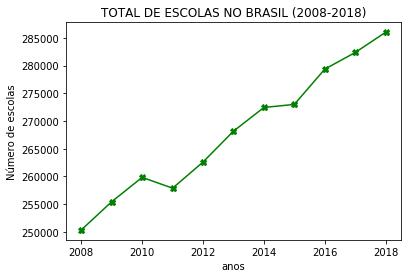

In [3]:
##Gráfico da evolução do número de escolas no Brasil
grafico('ano','Total_Escolas', titulo='TOTAL DE ESCOLAS NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='green')


,ano,Total_Alunos
0,2008,54284144
1,2009,54434636
2,2010,54131255
3,2011,54436318
4,2012,54757106
5,2013,55424331
6,2014,56064675
7,2015,54851222
8,2016,52356383
9,2017,53900669


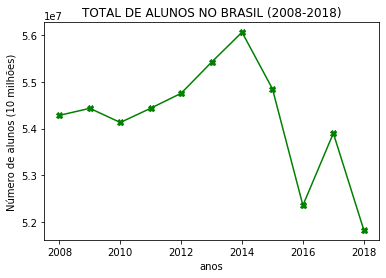

In [4]:
##Gráfico do número de estudantes no Brasil
grafico('ano','Total_Alunos', titulo='TOTAL DE ALUNOS NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos (10 milhões)', cor='green')


,ano,Total_Escolas_Sem_Comida
0,2008,25510
1,2009,28991
2,2010,25499
3,2011,26129
4,2012,26787
5,2013,27859
6,2014,28554
7,2015,26631
8,2016,27949
9,2017,28159


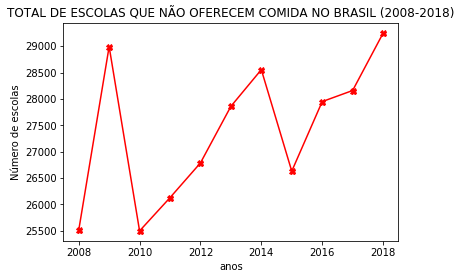

In [5]:
##Gráfico do número de escolas que não oferecem comida no Brasil
grafico('ano','Total_Escolas_Sem_Comida', titulo='TOTAL DE ESCOLAS QUE NÃO OFERECEM COMIDA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='red')


,ano,Total_Alunos_Sem_Comida
0,2008,7253069
1,2009,7893830
2,2010,6296361
3,2011,6673410
4,2012,6950434
5,2013,7268315
6,2014,7756188
7,2015,7411493
8,2016,7520419
9,2017,7657334


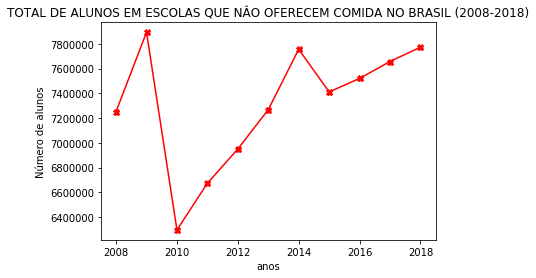

In [6]:
##Gráfico do número de alunos sem acesso a comida em suas escolas no Brasil
grafico('ano','Total_Alunos_Sem_Comida', titulo='TOTAL DE ALUNOS EM ESCOLAS QUE NÂO OFERECEM COMIDA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos', cor='red')


,ano,Total_Escolas_Sem_Agua
0,2008,947
1,2009,881
2,2010,973
3,2011,8194
4,2012,8172
5,2013,8826
6,2014,9374
7,2015,8159
8,2016,6882
9,2017,5847


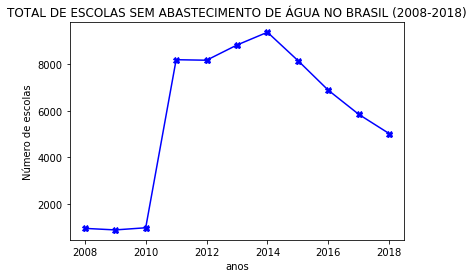

In [7]:
##Gráfico do número de escolas que não têm agua no Brasil
grafico('ano','Total_Escolas_Sem_Agua', titulo='TOTAL DE ESCOLAS SEM ABASTECIMENTO DE ÁGUA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='blue')


,ano,Total_Alunos_Sem_Agua
0,2008,98360
1,2009,78586
2,2010,78385
3,2011,531893
4,2012,564752
5,2013,680645
6,2014,771563
7,2015,681591
8,2016,481295
9,2017,457431


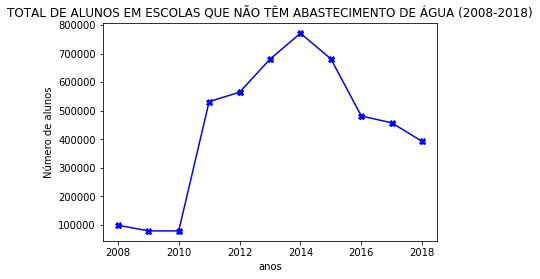

In [8]:
##Gráfico do número de alunos que não têm acesso a água em suas escolas no Brasil
grafico('ano','Total_Alunos_Sem_Agua', titulo='TOTAL DE ALUNOS EM ESCOLAS QUE NÃO TÊM ABASTECIMENTO DE ÁGUA (2008-2018)', xnome='anos', ynome='Número de alunos', cor='blue')


,ano,Total_Escolas_Sem_Energia
0,2008,17795
1,2009,15367
2,2010,13143
3,2011,11471
4,2012,10185
5,2013,8211
6,2014,7482
7,2015,6263
8,2016,5638
9,2017,4980


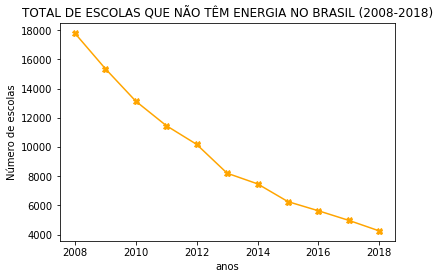

In [9]:
##Gráfico do número de escolas que não têm energia no Brasil
grafico('ano','Total_Escolas_Sem_Energia', titulo='TOTAL DE ESCOLAS QUE NÃO TÊM ENERGIA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='orange')


,ano,Total_Alunos_Sem_Energia
0,2008,606656
1,2009,519191
2,2010,430905
3,2011,380074
4,2012,328039
5,2013,253031
6,2014,243467
7,2015,194204
8,2016,170351
9,2017,174625


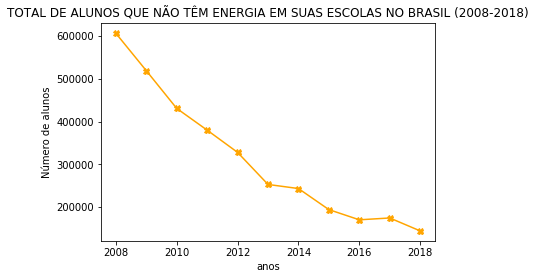

In [10]:
##Gráfico do número de alunos que não têm energia em suas escolas no Brasil
grafico('ano','Total_Alunos_Sem_Energia', titulo='TOTAL DE ALUNOS QUE NÃO TÊM ENERGIA EM SUAS ESCOLAS NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos', cor='orange')


,ano,Total_Escolas_Sem_Esgoto
0,2008,13419
1,2009,12113
2,2010,11478
3,2011,11505
4,2012,11054
5,2013,10727
6,2014,10127
7,2015,9483
8,2016,8829
9,2017,8449


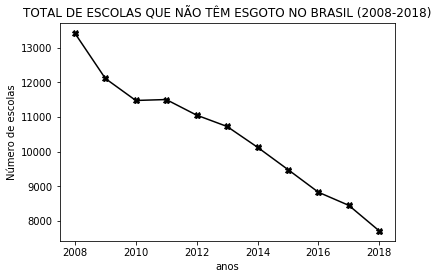

In [11]:
##Gráfico do número de escolas que não têm esgoto no Brasil
grafico('ano','Total_Escolas_Sem_Esgoto', titulo='TOTAL DE ESCOLAS QUE NÃO TÊM ESGOTO NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas')


,ano,Total_Alunos_Sem_Esgoto
0,2008,706531
1,2009,551865
2,2010,511048
3,2011,515170
4,2012,490328
5,2013,539450
6,2014,542457
7,2015,549655
8,2016,462977
9,2017,507945


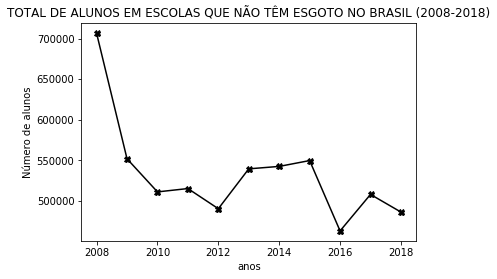

In [12]:
##Gráfico do número de alunos que não têm esgoto em suas escolas no Brasil
grafico('ano','Total_Alunos_Sem_Esgoto', titulo='TOTAL DE ALUNOS EM ESCOLAS QUE NÃO TÊM ESGOTO NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos')


,ano,Total_Escolas_Sem_Lab_Info
0,2008,197742
1,2009,196116
2,2010,190419
3,2011,178303
4,2012,176878
5,2013,182216
6,2014,187082
7,2015,104803
8,2016,108300
9,2017,111832


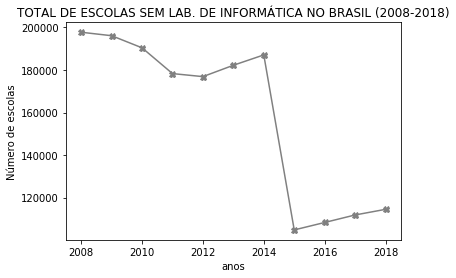

In [13]:
##Gráfico do número de escolas sem laboratório de informatica no Brasil
grafico('ano','Total_Escolas_Sem_Lab_Info', titulo='TOTAL DE ESCOLAS SEM LAB. DE INFORMÁTICA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='gray')


,ano,Total_Alunos_Sem_Lab_Info
0,2008,22480100
1,2009,19571038
2,2010,16426559
3,2011,13996174
4,2012,12657942
5,2013,13169197
6,2014,14142918
7,2015,14558972
8,2016,15618353
9,2017,18352016


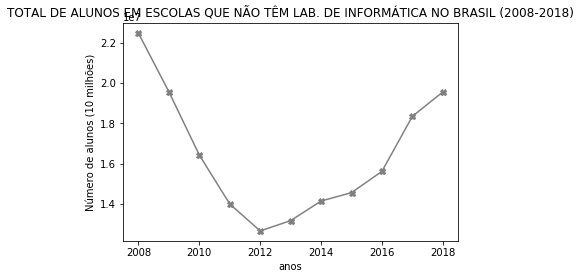

In [14]:
##Gráfico do número de alunos que não têm acesso a laboratório de informatica no Brasil
grafico('ano','Total_Alunos_Sem_Lab_Info', titulo='TOTAL DE ALUNOS EM ESCOLAS QUE NÃO TÊM LAB. DE INFORMÁTICA NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos (10 milhões)', cor='gray')


,ano,Total_Escolas_Sem_Lab_Cien
0,2008,232348
1,2009,237087
2,2010,240803
3,2011,237820
4,2012,242008
5,2013,247399
6,2014,251334
7,2015,167374
8,2016,166102
9,2017,166214


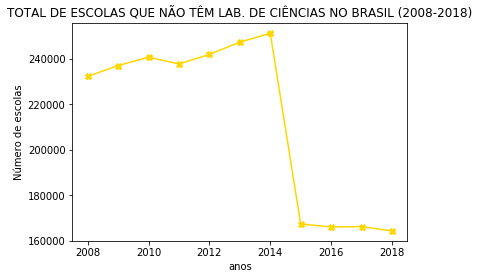

In [15]:
##Gráfico do número de escolas sem laboratório de ciências no Brasil
grafico('ano','Total_Escolas_Sem_Lab_Cien', titulo='TOTAL DE ESCOLAS QUE NÃO TÊM LAB. DE CIÊNCIAS NO BRASIL (2008-2018)', xnome='anos', ynome='Número de escolas', cor='gold')


,ano,Total_Alunos_Sem_Lab_Cien
0,2008,40693773
1,2009,40614873
2,2010,40030745
3,2011,39847319
4,2012,39862010
5,2013,40593845
6,2014,41361366
7,2015,40567647
8,2016,38320548
9,2017,41402974


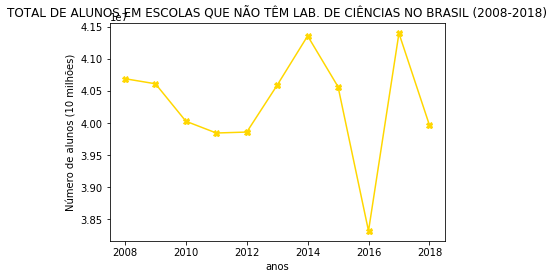

In [16]:
##Gráfico do número de alunos sem aceso a laboratórios de ciencias em suas escolas no Brasil
grafico('ano','Total_Alunos_Sem_Lab_Cien', titulo='TOTAL DE ALUNOS EM ESCOLAS QUE NÃO TÊM LAB. DE CIÊNCIAS NO BRASIL (2008-2018)', xnome='anos', ynome='Número de alunos (10 milhões)', cor='gold')


In [17]:
################################################## Ignorar ##################################################
##Teste das funcionalidades do programa

##cópia do trecho do código que análisa se já existe o arquivo de saída e se suas informações estão corretas.
print(datetime.now())
try:
    with open('saida.csv', 'r'):
        print('Arquivo Existente !')
except:
    print('Arquivo de saída inexistente. Criando arquivo...')
    with open('saida.csv', 'w'):
        print('Arquivo de saida criado com sucesso !')

##Verificar a integridade dos dados              
print('Verificando a integridade dos dados...')
if integridade('saida.csv', '3e04a1074604dbb49e60d3a6d6381e47'):
    print('Integridade dos dados (OK!)')
    print('\nOs dados já foram obtidos anteriormente, não analisaremos novamente para não perder tempo')
    print('Utilize a tabela: saida.csv, para analisar')
else:
    print('ERRO!')

2019-11-01 16:38:48.024129
Arquivo Existente !
Verificando a integridade dos dados...
Integridade dos dados (OK!)

Os dados já foram obtidos anteriormente, não analisaremos novamente para não perder tempo
Utilize a tabela: saida.csv, para analisar


In [18]:
################################################## Ignorar ##################################################
##Teste das funcionalidades do programa

##Resultado da análise de dados feita entre os anos de 2008 a 2018
df = pd.read_csv('saida.csv', sep=';', encoding='ANSI', low_memory=False)
df


,ano,Total_Escolas,Total_Alunos,Total_Escolas_Sem_Comida,Total_Escolas_Sem_Agua,Total_Escolas_Sem_Energia,Total_Escolas_Sem_Esgoto,Total_Escolas_Sem_Lab_Info,Total_Escolas_Sem_Lab_Cien,Total_Alunos_Sem_Comida,Total_Alunos_Sem_Agua,Total_Alunos_Sem_Energia,Total_Alunos_Sem_Esgoto,Total_Alunos_Sem_Lab_Info,Total_Alunos_Sem_Lab_Cien
0,2008,250350,54284144,25510,947,17795,13419,197742,232348,7253069,98360,606656,706531,22480100,40693773
1,2009,255445,54434636,28991,881,15367,12113,196116,237087,7893830,78586,519191,551865,19571038,40614873
2,2010,259831,54131255,25499,973,13143,11478,190419,240803,6296361,78385,430905,511048,16426559,40030745
3,2011,257880,54436318,26129,8194,11471,11505,178303,237820,6673410,531893,380074,515170,13996174,39847319
4,2012,262601,54757106,26787,8172,10185,11054,176878,242008,6950434,564752,328039,490328,12657942,39862010
5,2013,268166,55424331,27859,8826,8211,10727,182216,247399,7268315,680645,253031,539450,13169197,40593845
6,2014,272440,56064675,28554,9374,7482,10127,187082,251334,7756188,771563,243467,542457,14142918,41361366
7,2015,272996,54851222,26631,8159,6263,9483,104803,167374,7411493,681591,194204,549655,14558972,40567647
8,2016,279358,52356383,27949,6882,5638,8829,108300,166102,7520419,481295,170351,462977,15618353,38320548
9,2017,282362,53900669,28159,5847,4980,8449,111832,166214,7657334,457431,174625,507945,18352016,41402974
